In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
mat_contents = sio.loadmat('tennis_data.mat')
G = mat_contents['G']
namelist = []
for i in range(len(mat_contents['W'])):
    namelist.append(mat_contents['W'][i][0][0])
W = np.array(namelist)

In [2]:
def psi(x):
    return norm.pdf(x)/norm.cdf(x)
def lambd(x):
    output = psi(x)*(psi(x)+x)
    return output

In [3]:
pv=.9; M=len(W); N=len(G)
Ms = np.nan*np.ones((M,1))
Ps = np.nan*np.ones((M,1))

Mgs = np.zeros((N,2))
Pgs = np.zeros((N,2))

Msg = np.nan*np.ones((N,2))
Psg = np.nan*np.ones((N,2))

In [4]:
for i in range(100):
    for p in range(M):
        Ps[p] = 1/pv+np.sum(Pgs[G==p+1])
        Ms[p] = np.sum(Pgs[G==p+1]*Mgs[G==p+1])/Ps[p]
        
    Psg = Ps[G-1].squeeze() - Pgs
    Msg = ((Ps[G-1]*Ms[G-1]).squeeze()-Pgs*Mgs)/Psg
    
    vgt = 1+np.sum(1/Psg,axis=1)
    mgt = Msg[:,0]-Msg[:,1]
    
    Mt = mgt+np.sqrt(vgt)*psi(mgt/np.sqrt(vgt))
    Pt = 1/(vgt*(1-lambd(mgt/np.sqrt(vgt))))
    
    ptg = Pt - 1/vgt
    mtg = (Mt*Pt-mgt/vgt)/ptg
    
    Pgs = 1/(1+np.tile(1/ptg,(2,1)).T+1/Psg[:,np.array([1,0])])
    Mgs = np.vstack((mtg,-mtg)).T+Msg[:,np.array([1,0])]

In [5]:
val = np.sort(Ms.squeeze())[::-1]
ids = np.argsort(Ms.squeeze())[::-1]

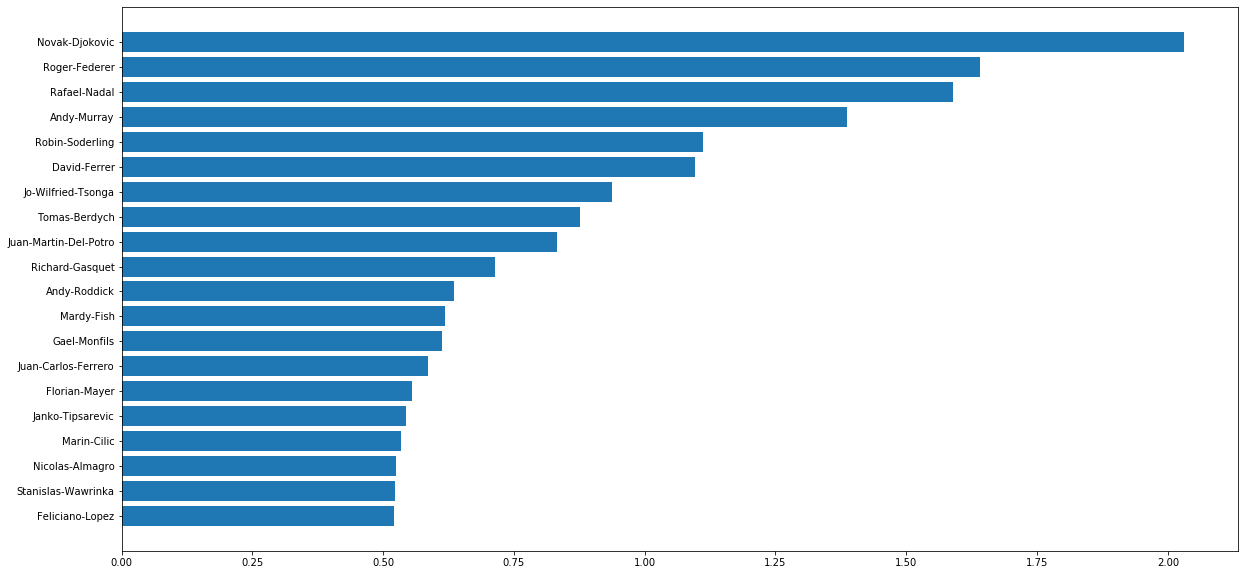

In [6]:
plt.figure(figsize=(20,10))
plt.barh(np.arange(20),val[:20],tick_label=W[ids[:20]])
plt.gca().invert_yaxis()